In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data = pd.read_csv("pl_twitter_all.csv", header=None, engine='python', encoding='utf-8')

In [3]:
data.head()

,0,1
0,"No tak, Broź to zbyt oczywisty wybór dla Pana ...",2
1,!! powiedziała w Sejmie o 550 stypendiach d...,0
2,Pełna zgoda. Kierowcy mieli powody do radości ...,2
3,"Szkocja “ Glencoe, Scotland",1
4,Uśmiechnij się. Nie będziesz musiała się tłuma...,2


In [4]:
data.rename(columns = {0:'text',1:'label'}, inplace = True) 

In [5]:
data.head()

,text,label
0,"No tak, Broź to zbyt oczywisty wybór dla Pana ...",2
1,!! powiedziała w Sejmie o 550 stypendiach d...,0
2,Pełna zgoda. Kierowcy mieli powody do radości ...,2
3,"Szkocja “ Glencoe, Scotland",1
4,Uśmiechnij się. Nie będziesz musiała się tłuma...,2


In [6]:
def change(x):
    if x==2:
        return 'positive'
    elif x==1:
        return 'neutral'
    else:
        return 'negative'
    
data['label'] = data['label'].apply(change)

In [7]:
data.head()

,text,label
0,"No tak, Broź to zbyt oczywisty wybór dla Pana ...",positive
1,!! powiedziała w Sejmie o 550 stypendiach d...,negative
2,Pełna zgoda. Kierowcy mieli powody do radości ...,positive
3,"Szkocja “ Glencoe, Scotland",neutral
4,Uśmiechnij się. Nie będziesz musiała się tłuma...,positive


In [8]:
data['label'].value_counts()

positive    39345
negative    26180
neutral     23749
Name: label, dtype: int64

In [9]:
# Deleting duplicates
data.drop_duplicates(subset ="text", keep = 'first', inplace = True)

In [10]:
data['label'].value_counts()

positive    39345
negative    26180
neutral     23749
Name: label, dtype: int64

In [11]:
my_pal = {'negative': "r", 'neutral':"y",'positive': "g"}

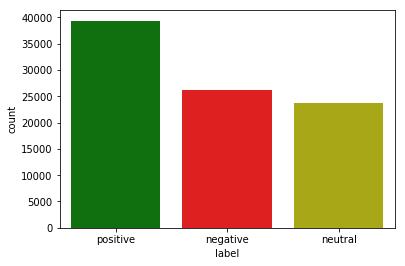

In [12]:
#Distributions of classes just after data cleaning
sns.countplot(data['label'], palette=my_pal)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


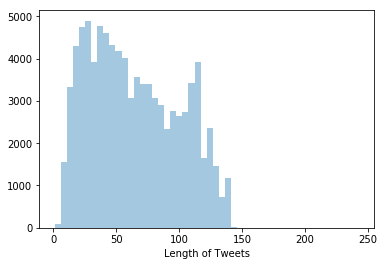

In [13]:
#Histogram of tweets’ lengths (number of characters in a tweet)
sns.distplot(data['text'].apply(lambda x: len(x)), kde=False,axlabel="Length of Tweets")

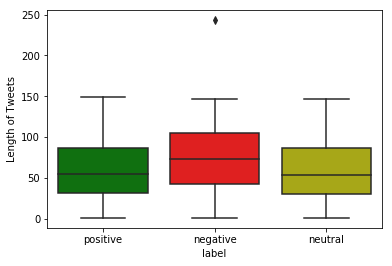

In [14]:
#Box plot of tweets’ lengths (number of characters in a tweet) per each class
data['Length of Tweets'] = data['text'].apply(lambda x: len(x))
sns.boxplot(x = 'label', y = 'Length of Tweets', data = data, palette=my_pal)

In [15]:
from wordcloud import WordCloud
from matplotlib.pyplot import figure

In [16]:
text_wordcloud = ' '.join(data['text'].tolist())
text_wordcloud_positive = ' '.join(data.loc[data['label'] == 'positive']['text'].tolist())
text_wordcloud_neutral = ' '.join(data.loc[data['label'] == 'neutral']['text'].tolist())
text_wordcloud_negative = ' '.join(data.loc[data['label'] == 'negative']['text'].tolist())


In [18]:
a_file = open(r"C:\Users\Michał Laskowski\Downloads\stopwords.txt", "r", encoding="utf-8")

list_of_stop_words = []
for line in a_file:
  stripped_line = line.strip()
  line_list = stripped_line.split()
  list_of_stop_words+=line_list

a_file.close()

#print(list_of_stop_words)

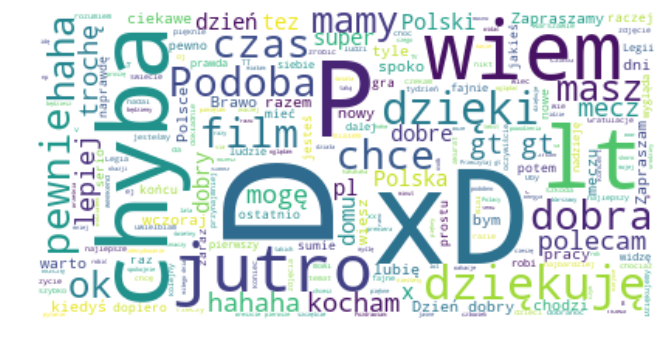

In [19]:
#Word cloud of words used in positive tweets
text = text_wordcloud_positive
wordcloud = WordCloud().generate(text)

stop_words =list_of_stop_words

wordcloud = WordCloud(stopwords = stop_words, max_font_size=100, max_words=1000, background_color="white").generate(text)
plt.figure(figsize=(10, 8), dpi=80)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

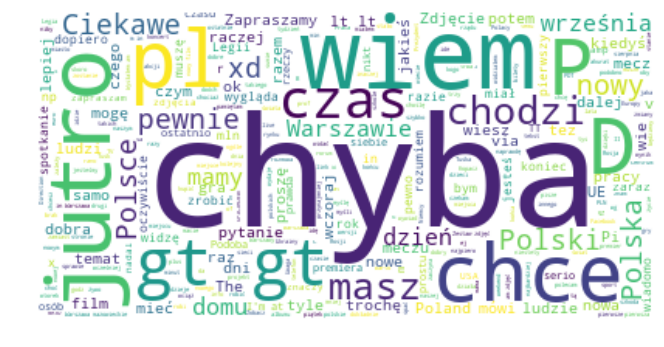

In [20]:
##Word cloud of words used in neutral tweets
text = text_wordcloud_neutral
wordcloud = WordCloud().generate(text)

stop_words =list_of_stop_words

wordcloud = WordCloud(stopwords = stop_words, max_font_size=100, max_words=1000, background_color="white").generate(text)
plt.figure(figsize=(10, 8), dpi=80)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

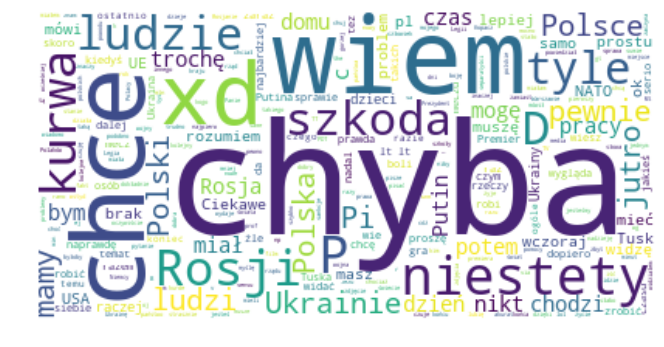

In [21]:
##Word cloud of words used in negative tweets
text = text_wordcloud_negative
wordcloud = WordCloud().generate(text)

stop_words =list_of_stop_words

wordcloud = WordCloud(stopwords = stop_words, max_font_size=100, max_words=1000, background_color="white").generate(text)
plt.figure(figsize=(10, 8), dpi=80)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()